## Chapter 1
# Physical Signal Modeling Intro

## Elementary Physical Modeling Problems

**1. Derive the equation**

$H(z) = D + C(zI - A)^{-1}B$

(Following [this derivation](https://ccrma.stanford.edu/~jos/filters/Transfer_Function_State_Space.html))

Using the definition of $H(z)$ as the $z$ transform of the impulse response:

$\begin{array}{ll}
H(z) &\triangleq \sum_{n=0}^{\infty}h(n)z^{-n}\\
&= D + \sum_{n=1}^{\infty}\left(CA^{n-1}B\right)z^{-n} &\text{ since }h(n) = \begin{cases}\begin{array}{ll}D, &n=0\\CA^{n-1}B, &n > 0\end{array}\end{cases}\\
&= D + z^{-1}C\left[\sum_{n=0}^{\infty}\left(z^{-1}A\right)^{n}\right]B\\
&= D + C\left(zI - A\right)^{-1}B &\text{ closed-form sum of a matrix geometric series}
\end{array}$

**2. In Newton's famous equation $f(t) = ma(t)$, suppose $f(t)$ is regarded as an "input signal" and the position $x(t)$ of the mass $m$ is regarded as an "output signal". Find the $s$-plane _transfer function_ $H(s) \triangleq X(s)/F(s)$. State any assumptions that are necessary.**

First, let's find the Laplace transform $F(s)$ of $f(t)$ in terms of $X(s)$ (the Laplace transform of $x(s)$ (getting help from [this section](https://ccrma.stanford.edu/~jos/filters/Moving_Mass.html) of _Introduction to Digital Filters_):

$\begin{array}{ll}
f(t) &= ma(t)\\
F(s) &= \mathcal{L}_s\{m\ddot{x}\} &\text{ Laplace transform of both sides}\\
&= m\mathcal{L}_s\{\ddot{x}\} &\text{ by linearity of Laplace transform}\\
&= m\left[s\mathcal{L}_s\{\dot{x}\} - \dot{x}(0)\right] &\text{ by differentiation theorem of Laplace transform}\\
&= m\left\{s\left[sX(s) - x(0)\right] - \dot{x}(0)\right\} &\text{ another round of differentiation theorem}\\
&= m\left[s^2X(s) - sx(0) - \dot{x}(0)\right]\\
&= ms^2X(s) &\text{ assuming initial position }x(0)\text{ and initial velocity }\dot{x}(0)\text{ are } 0\\
\frac{F(s)}{X(s)} &= ms^2 &\text{ solving for inverse } s \text{-plane transfer function}\\
\frac{X(s)}{F(s)} &\triangleq H(s) = \frac{1}{m}s^{-2}
\end{array}$

Note the only assumptions made in the above proof are in the third-to-last step, assuming initial position $x(0)$ and initial velocity $\dot{x}(0)$ are both $0$.

**3. Referring to [Fig. 1.9 on page 25](https://ccrma.stanford.edu/~jos/pasp/Equivalent_Circuits.html),**

![](https://ccrma.stanford.edu/~jos/pasp/img345.png)

**a) Write down the ODE that describes the system using the sign conventions in [Fig. 1.10 on page 25](https://ccrma.stanford.edu/~jos/pasp/Equivalent_Circuits.html).**

![](https://ccrma.stanford.edu/~jos/pasp/img351.png)

$f_{ext}(t) - f_m(t) - f_k(t) = 0 \implies f_{ext}(t) = f_m(t) + f_k(t)$

Expressing this equation as an ODE:

$f_{ext}(t) = m\ddot{x}(t) + kx(t)$

**b) Write down the ODE that results if the signs on the "force source" (voltage source) in Fig. 1.10 are reversed.**

If the voltage source sign is switched, we have

$-f_{ext}(t) - f_m(t) - f_k(t) = 0 \implies f_{ext}(t) = -f_m(t) - f_k(t)$

Expressing this equation as an ODE:

$f_{ext}(t) = -m\ddot{x}(t) - kx(t)$

**In the following, assume the signs are as given in Fig. 1.10.**

**c) Find the $s$-plane transfer function relating the driving-force input signal $f_{ext}(t)$ to the mass-velocity output signal $v_m(t)$.**

$\begin{array}{ll}
f_{ext}(t) &= m\ddot{x}(t) + kx(t)\\
F_{ext}(s) &= \mathcal{L}_s\{m\ddot{x} + kx\} &\text{ Laplace transform of both sides}\\
&= m\mathcal{L}_s\{\ddot{x}\} + k\mathcal{L}_s\{x\} &\text{ by linearity}\\
&= m\left[s\mathcal{L}_s\{\dot{x}\} - \dot{x}(0)\right] + k\mathcal{L}_s\{x\} &\text{ by differentiation theorem}\\
&= m\left[s\mathcal{L}_s\{\dot{x}\} - \dot{x}(0)\right] + k\frac{\mathcal{L}_s\{\dot{x}\} + x(0)}{s} &\text{ by integration theorem}\\
&= m\left[sV_m(s) - v_m(0)\right] + k\frac{V_k(s) + x(0)}{s}\\
&= msV_m(s) + k\frac{V_k(s)}{s} &\text{ assuming the initial velocity } v(0) = 0 \text{ and the initial position } x(0) = 0\\
&= V_m(s)ms + V_m(s)ks^{-1} &\text{since }v_m(t) = v_k(t) \triangleq v(t)\\
&= V_m(s)\left(ms + ks^{-1}\right)\\
\frac{F_{ext}(s)}{V_m(s)} &= ms + ks^{-1} &\text{ solving for inverse } s \text{-plane transfer function}\\
\frac{V_m(s)}{F_{ext}(s)} &\triangleq H(s) = \frac{1}{ms + ks^{-1}} = \frac{s^{-1}}{m + ks^{-2}} = \frac{\frac{1}{m}s^{-1}}{1 + \frac{k}{m}s^{-2}}
\end{array}$

**d) Find the poles of the system.**

The poles of the system will occur where the denominator, $1 + \frac{k}{m}s^{-2} = 0$. Solving for $s$,

$\begin{align}
1 + \frac{k}{m}s^{-2} &= 0\\
\frac{k}{m}s^{-2} &= -1\\
-\frac{k}{m} &= s^{2}\\
s &= \pm j\sqrt{\frac{k}{m}}\\
\end{align}$

Note that this implies we can express $H(s)$ as a _series_ of _complex one-poles:_

$H(s) = \frac{\frac{1}{m}s^{-1}}{\left(1 + j\sqrt{\frac{k}{m}}s^{-1}\right)\left(1 - j\sqrt{\frac{k}{m}}s^{-1}\right)}$

**e) Where are the zeros?**

Zeros will occur when the numerator, $\frac{1}{m}s^{-1} = 0 \implies s^{-1} = 0$.

Thus, there are technically zeros only when $s \to \pm \infty$.

**f) Write down the equations describing a linear, time-invariant state-space model, choosing the spring compression $x(t)$ as state-variable 1 and the mass velocity $v_m(t)$ as state-variable 2.**

Let's start by expressing the ODE as a _forward difference_ approximation to the derivative. First, we can express acceleration as:

$\ddot{x}(t) = \dot{v}(t) = \lim_\limits{\delta \to 0} \frac{v(t+\delta) - v(t)}{\delta} \approx \frac{v\left[(n+1)T\right] - v(nT)}{T}$

Now we can substitute into the ODE to make a finite approximation:

$\begin{array}{ll}
f_{ext}(t) &= m\ddot{x}(t) + kx(t)\\
f_{ext}(nT) &= m\frac{v\left[(n+1)T\right] - v(nT)}{T} + kx(nT)\\
{f_{ext}}_{n} &= m\frac{v_{n+1} - v_{n}}{T} + kx_{n} &\text{ letting }x_n \triangleq x(nT)\\
v_{n+1} &= \frac{T}{m}\left({f_{ext}}_{n} - kx_n\right) + v_n &\text{ solving for }v_{n+1}\\
&= \frac{T}{m}{f_{ext}}_{n} - \frac{Tk}{m}x_n + v_n
\end{array}$

For position, we always have simply $x_{n+1} = x_n + Tv_n$. (Remember from the text that since the mass and spring displacements are physically the same, we can define $x_m = x_k \triangleq x$, and their velocities are similarly equal, so $v_m = v_k \triangleq v$. Thus I make no distinguishment between different $v$s and $x$s here.)

Using these relations for $v_{n+1}$ and $x_{n+1}$, we can express the state-update part of the state space model as

$\begin{array}{}
\underline{x}(n+1) &= &A&\underline{x}(n) &+ &B&\underline{u}(n)\\
\begin{bmatrix}x_{n+1}\\v_{n+1}\end{bmatrix} &= &\begin{bmatrix}1 &T\\-\frac{Tk}{m} &1\end{bmatrix}&\begin{bmatrix}x_n\\v_n\end{bmatrix}&+&\begin{bmatrix}0\\\frac{T}{M}\end{bmatrix}&{f_{ext}}_n
\end{array}$

**g) Under what conditions does this system become identical to the force-driving mass system in [Fig. 1.6](https://ccrma.stanford.edu/~jos/filters/Moving_Mass.html)? Explain how this makes physical sense.**

![](https://ccrma.stanford.edu/~jos/pasp/img217.png)

This system becomes identical to the system in the figure above when $k = 0$ (which causes the term $-\frac{Tk}{m}x_n$ to disappear, resulting in the no-spring force-driven mass scenario $v_{n+1} = \frac{T}{m}{f}_n + v_n$ as derived in the book).

This makes physical sense since a spring with stiffness constant $k=0$ corresponds to a restoring force provided by the spring of $f = kx = 0\cdot x = 0$.  In other words, this corresponds to a spring that has no restorative force at all, which is equivalent to there being no spring in the system at all (which is, of course, equivalent to the figure above).

**h) Digitize the ODE, converting it to an explicit difference equation that computes a sample of velocity $v_m(nT)$ as a function of previous velocity and driving-force samples.**

In problem **(f)** above, we derived

$\begin{align}
v_{n+1} &= \frac{T}{m}{f_{ext}}_{n} - \frac{Tk}{m}x_n + v_n\\
\implies v_{n} &= \frac{T}{m}{f_{ext}}_{n-1} - \frac{Tk}{m}x_{n-1} + v_{n-1}\\
\end{align}$

The question asks for a function of previous _velocity_ and _driving-force_ samples. We're almost there - we just have to express the previous _position_ $x_{n-1}$ in terms of previous _velocity_ samples.

In order to accurately express $x_{n-1}$ in terms of velocity, we would need to explicitly integrate $x_{n-1} = x_{n-2} + Tv_{n-2}$ for all time (where $v(n)$ is constantly changing). I'm not certain this is the desired approach for this question, but I will simply estimate this by performing _one integration_, and then setting $n=2$, such that $x_{n-2} = x_0 = 0$, our assumed initial position: _(Note that the applied force is assumed to change over time, which prevents any closed-form expression of $x(n)$.)_

$\begin{array}{ll}
v_{n} &= \frac{T}{m}f_{n-1} - \frac{Tk}{m}x_{n-1} + v_{n-1} &{f_{ext}}_n \to f_n\\
&= \frac{T}{m}f_{n-1} - \frac{Tk}{m}\left[x_{n-2} + Tv_{n-2}\right] + v_{n-1} &\text{ substituting }x_{n-1} = x_{n-2} + Tv_{n-2}\\
&\approx \frac{T}{m}f_{n-1} - \frac{T^2k}{m}v_{n-2} + v_{n-1} &\text{ substituting }x_{n-2} = 0\\
\end{array}$

**i) Find the $z$-plane transfer function $H(z) = V(z)/F(z)$ of the difference equation.**

We can find this $z$-plane transfer function by inspection, by thinking of the difference equation as being in the usual form $y(n) = b_1x(n) - a_1y(n - 1) - a_2y(n-2)$, and seeing that $b_1 = \frac{T}{m}$, $a_1 = -1$, and $a_2 = \frac{T^2k}{m}$. Thus,

$H(z) = \frac{b_1z^{-1}}{1 + a_1z^{-1} + a_2z^{-2}} = \frac{\frac{T}{m}z^{-1}}{1 -z^{-1} + \frac{T^2k}{m}z^{-2}}.$

**j) Find the poles of the digitized system.**

The poles of this system will occur when the denominator of the transfer function is equal to $0$. If we set $T = 1$, this will happen when $z = \frac{\pm\sqrt{m (m - 4 k)} + m}{2 m}$ (solved using Wolfram Alpha).

**k) Find the zeros of the digitized system.**

This transfer function _also_ has zeros only when $z = \pm \infty$.

**l) Discuss the quality of the digitization in terms of how accurately the resonance frequency and damping characteristics are carried over from continuous to discrete time.**

Note that the _digitized_ transfer function derived above is the same as the _continuous_ one, except for an extra $z^{-1}$ term in the denominator. I am going to answer this question by finding the resonance frequency and damping _graphically_ (by observing the behavior of the amplitude and impulse response):

(_I am setting $T = 1$._)

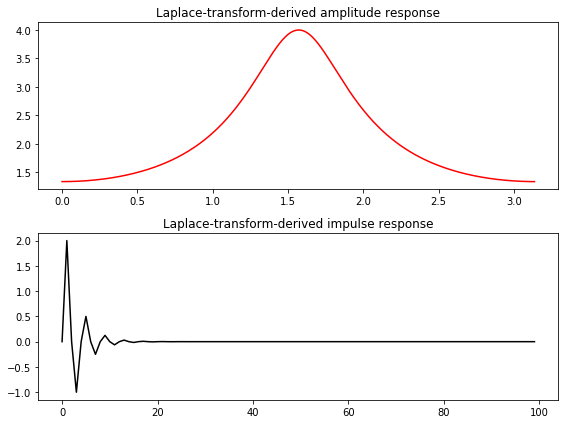

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import freqz, lfilter

impulse = [1.0] + [0] * (99)

T = 1
m = 0.5 # arbitrary mass
k = 0.25 # arbitrary spring stiffness

# Plot "continuous" case:
B = [0, T/m]; A = [1, 0, T ** 2 * k / m]
w, H = freqz(B, A)

plt.figure(figsize=(8, 6))
plt.subplot(211)
plt.title('Laplace-transform-derived amplitude response')
plt.plot(w, np.abs(H), c='red')

plt.subplot(212)
plt.title('Laplace-transform-derived impulse response')
plt.plot(lfilter(B, A, impulse), c='k')
plt.tight_layout()

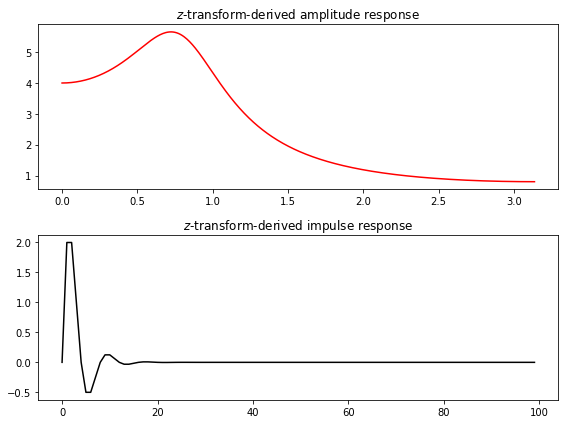

In [7]:
# Plot "digitized" case:
B = [0, T/m]; A = [1, -1, T ** 2 * k / m]
w, H = freqz(B, A)

plt.figure(figsize=(8, 6))
plt.subplot(211)
plt.title('$z$-transform-derived amplitude response')
plt.plot(w, np.abs(H), c='red')

plt.subplot(212)
plt.title('$z$-transform-derived impulse response')
plt.plot(lfilter(B, A, impulse), c='k')
plt.tight_layout()

Welp, I wouldn't read too much into this result. Again, the difference between my derivations is an extra $z^{-1}$ term in the numerator, which makes a huge difference. This came from my perhaps ill-motivated method of integrating for position over _one term_ and assuming $v_n,x_n = 0$ for all terms $n - 2$ and earlier. More accurate ways of integrating to solve for the $x_n$ term (such as expanding more and more terms in the explicit integration) should produce more accurate results.

## Lab

Here is my code for the STK "effect" lab:
```cpp
#ifndef CPP_CHAPTER1LABEFFECT_H
#define CPP_CHAPTER1LABEFFECT_H

#include <Effect.h>
#include <BiQuad.h>

class Chapter1LabEffect : public stk::Effect {
    stk::BiQuad biQuad;

    double T = 0.1;
    double mass = 1.0;
    double k = 100 * stk::PI;

public:
    Chapter1LabEffect() {
        // TODO not confident about these parameters/discrete derivation.
        biQuad.setB0(0);
        biQuad.setB1(T/mass);
        biQuad.setA1(-1);
        biQuad.setA2(T * T * k/mass);
    }

    // Takes force input, returns mass velocity
    inline stk::StkFloat tick(stk::StkFloat force)  {
        return biQuad.tick(force);
    }

    //! Reset and clear all internal state.
    void clear() override {
        biQuad.clear();
    }

    //! Set the mixture of input and "effected" levels in the output (0.0 = input only, 1.0 = effect only).
    void setEffectMix( stk::StkFloat mix ) override {
        // no-op.
    }
};

#endif //CPP_CHAPTER1LABEFFECT_H

```

```cpp
#include <iostream>
#include "Chapter1LabEffect.h"

int main() {
    Chapter1LabEffect chapter1LabEffect;

    const stk::StkFloat impulse[10] = {1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0};
    for (const stk::StkFloat sample : impulse) {
        stk::StkFloat massVelocity = chapter1LabEffect.tick(sample);
        std::cout << "Mass velocity: " << massVelocity << '\n';
    }
    return 0;
}
```

... and here is the output:

```
/Users/khiner/Development/notebooks/physical_audio_signal_processing/cpp/cmake-build-debug/cpp
Mass velocity: 0
Mass velocity: 0.1
Mass velocity: 0.1
Mass velocity: -0.214159
Mass velocity: -0.528319
Mass velocity: 0.144483
Mass velocity: 1.80424
Mass velocity: 1.35034
Mass velocity: -4.31786
Mass velocity: -8.56008

Process finished with exit code 0
```